# Data Types


* Boolean - True or False

* Character - char, varchar, text

* Numeric - interger and floating-point number

* Temporal - date, time, timestamp, and interval

* Universally Unique Identifiers

* Array - stores an array of strings, numbers, etc

* JSON

* Hstore key-value pair

* Specila types such as network address and geometric data

[Data Types](https://www.postgresql.org/docs/current/datatype.html)



* Searching for best practice online is the recommended.

* When creating a database and table, take your time to plan for long term storage. 

# Primary Keys and Foreign Keys

* A primary key is a column or a group of columns used to identify a row uniquely in a table. For instance, a id column, which usually identifies every row differently. It usually has the value [PK]

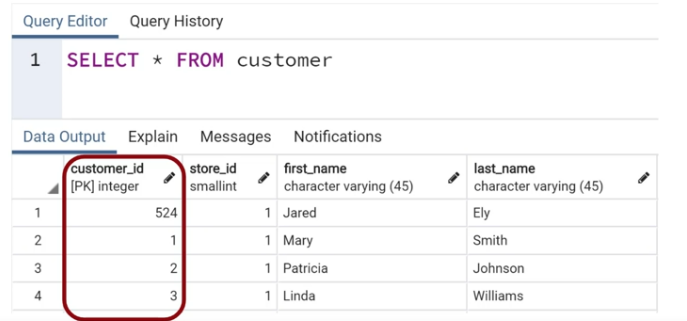

* A foreign key is a field or group of fields in a table that uniquely identifies a row in another table.
* A foreign key is defined in a t able that references to the primary key of the other table.
* The table that contains the foreign key is called referencing table or child table
* A table can have multiple foreign keys depending on its relationships with other tables.

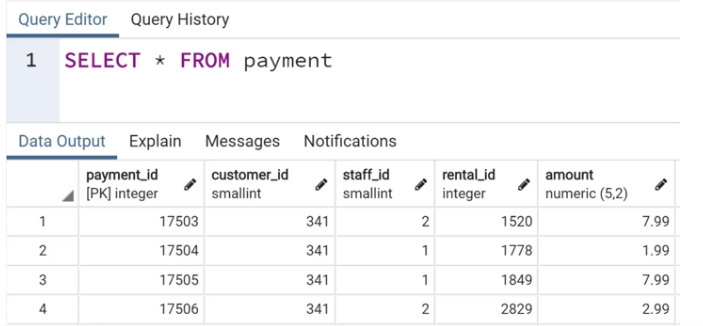

You can see that the other id's are foreign keys, and they can be repeated.

* Primary key and foreign key typically make good column choices for joining together two or more tables
* When creating tables and defining columns, we can use constraints to define columns as being a primary key, or attaching a foreign key relationship to another table.


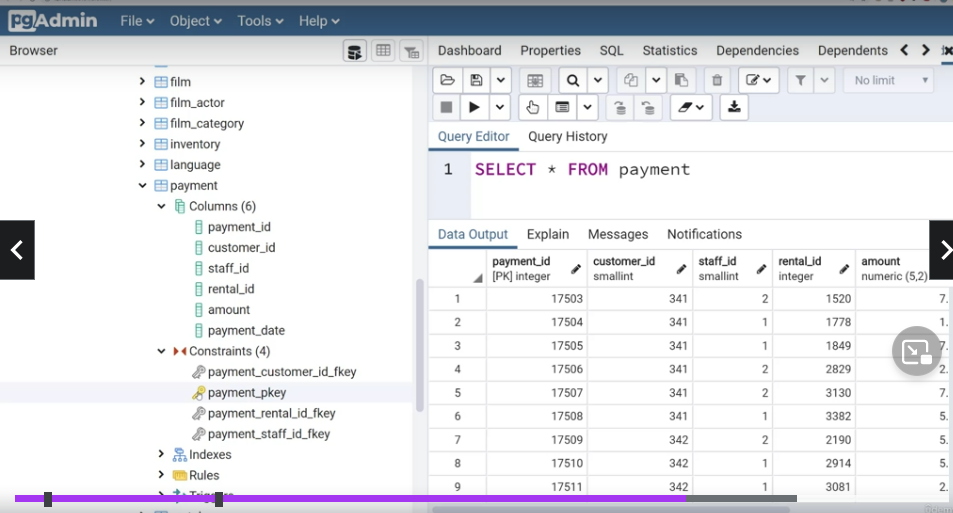

# Constraints

* Constraints are the rules enforced on data columns on table
* These are used to prevent invalid data from being entered into the database. It ensures the accuracy and reliability of the data in the database.


Constraints can be divided into two main categories:

   * Column Constraints
       * Constraints the data in a column to adhere to certain conditions
   * Table Constraints
       * Applied to the entire table rather than to an individual column

#### Most Common Constraints

* Column Constraints
    * NOT NULL
        * Ensures that a column cannot have NULL value
    * UNIQUE
        * Ensures that all values in a a column are different
    * PRIMARY Key
        * Uniquely identifies each row/record in a database table
    * FOREIGN Key
        * Constraint data base on columns in other tables
    * CHECK
        * Ensures that all values in a column satisfy certain conditions
    * EXCLUSION
        * Ensures that if any two rows are compared on the specified column or expression using the specified operator, not all of these comparisons will return TRUE

* Table Constraints
    * CHECK (condition)
        * To check a condition when insterting or updating data.
    * REFERENCES
        * To constrain the value stored in the column that must exist in a column in another table
    * UNIQUE (column_list)
        * Forces the values stored in the columns listed inside the parenthesis to be unique
    * PRIMARY KEY (column_list)
        * Allows you to define the primary key that consists of multiple columns

# CREATE Table

CREATE TABLE table_name (
       column_name TYPE column_constraint,
       column_name TYPE column_constraint,
       table_consraint table constraint)
       INHERITS existing_table_name;

#### SERIAL

In postgreSQL, a sequence is a special kind of database object that generates a sequence of integers. A sequence is often used as the primary key colum in a table
* SERIAL will create a sequence object and set the next value generated by the sequence as the default value for the column. This is perfect for a primary key, because it logs unique integer entries for you automatically upon insertion.
    * If a row is later removed, the column with teh SERIAL data type will not adjust, marking the act that a row was removed from the sequence, for example 1,2,3,5,6,7 -> you know 4 was removed at some point.

CREATE TABLE player (
       player_id SERIAL PRIMARY KEY,
       age SMALLINT NOT NULL);

# INSERT

Allows you to add in rows to a table

INSERT INTO table(column1,column2,...)
    VALUES
    (value1,value2,...)

You can also insert values from another table:


INSERT INTO table(column1,column2,...)
SELECT column1,column2,...
FROM another_table
WHERE condition;

Keep in mind, the inserted row values must match up for the table, including contstraints.

SERIAL columns do not need to be provided a value.

# UPDATE

The UPDATE keyword allows for the changing of values of the columns in a table

UPDATED table
SET column1 = value1,
    column2 = value2, ...
WHERE
    condition;
    
Ex:

UPDATE account
SET last_login = CURRENT_TIMESTAMP
WHERE last_login IS NULL;

Obs: if you remove the WHERE condition, it will update everything

Ex2:

UPDATE TableA
SET original_col = TableB.new_col
FROM TableB
WHERE TableA.id = TableB.id

* Return afftected rows

UPDATE account
SET last_login = created_on
RETURNING account_id,last_login -> shows rows updated

# DELETE

We can use DELETE clause to remove rows from a table

DELETE FROM table
WHERE row_id = 1

We can delete rows based on their presence in other tables

DELETE FROM TableA
USING TableB
WHERE TableA.id = TableB.id

Similar to UPDATE command, you can also add in a RETURNING call to return rows that were removed.

# ALTER

The ALTER clause allows for changes to an existing table structure, s.a.:
   * Adding, dropping or renaming columns
   * Changing a column's data type
   * Set DEFAULT values for a column
   * Add CHECK constraints
   * Rename table
   
[ALTER table](https://www.postgresql.org/docs/current/sql-altertable.html)

ALTER TABLE table_name
ADD COLUMN new_col TYPE

ALTER TABLE table_name
DROP COLUMN col_name

ALTER TABLE table_name
ALTER COLUMN col_name
SET DEFAULT value / 
DROP DEFAULT value / 
SET NOT NULL / 
DROP NOT NULL / 
ADD CONSTRAINT constraint_name/
etc...

# DROP

DROP allows for the complete removal of a column in a table.

* In PostgreSQL this will also automatically remove all of its indexes and constraints involving the column.
* However, it will not remove columns used in views, triggers, or stored procedures without the additional CASCADE clause.

ALTER TABLE table_name
DROP COLUMN col_name

* Remove all dependencies

ALTER TABLE table_name

DROP COLUMN col_name CASCADE

* Check for existence to avoid error

ALTER TABLE table_name

DROP COLUMN IF EXISTS col_name

# CHECK

The CHECK constraint allows us to created more customized constraints that adhere to a certain condition, s.a. making sure all insterted integer values fall bellow a certain threshold.

CREATE TABLE example(
    ex_id SERIAL PRIMARY KEY,
    age SMALLINT CHECK (age>21)
    parente_age SMALLINT CHECK(parent_age > age);